<a href="https://colab.research.google.com/github/angelfercontreras/IA_Redes_Neuronales/blob/main/Actividades/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
Actividad 6: Redes neuronales.
Entrenamiento de Red Neuronal Convolucional.
Angel Fernando Contreras García - 2017929 - N4
Materia: Inteligencia Artificial y Redes Neuronales
'''

'\nActividad 6: Redes neuronales.\nEntrenamiento de Red Neuronal Convolucional.\nAngel Fernando Contreras García - 2017929 - N4\nMateria: Inteligencia Artificial y Redes Neuronales\n'

In [2]:
# Cargar librerías
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [3]:
# Cargar datos
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [4]:
# Normalizar los valores de los píxeles para que estén entre 0 y 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# Ajustar la forma de los datos para que sea (n_images, x_shape, y_shape, channels)
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

In [6]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']

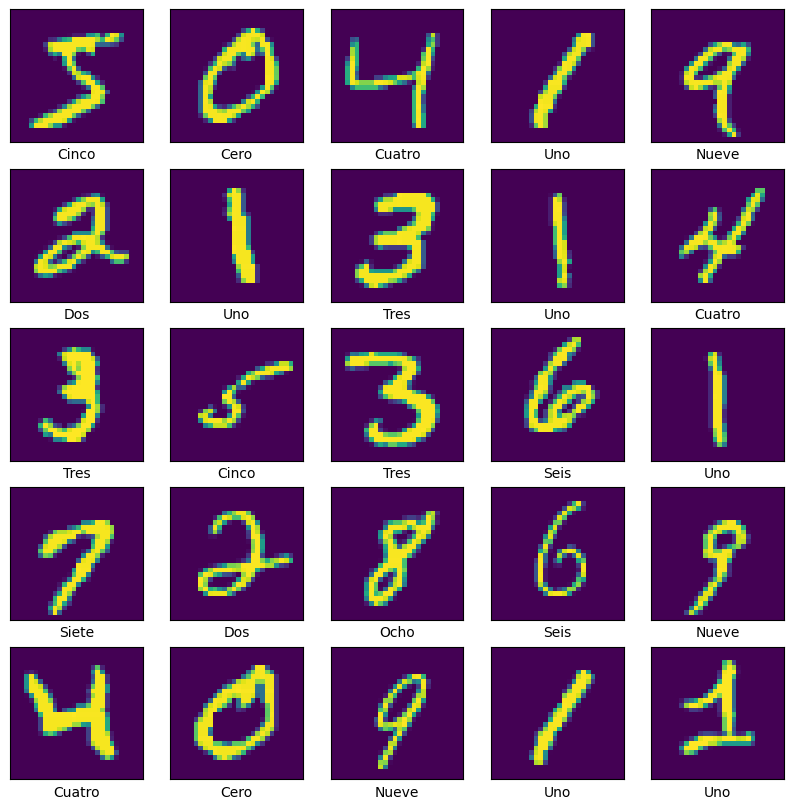

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
# Crear el modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [10]:
# Añadir capas densas
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [12]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1471 - accuracy: 0.9551 - val_loss: 0.0637 - val_accuracy: 0.9789
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0476 - accuracy: 0.9859 - val_loss: 0.0338 - val_accuracy: 0.9892
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0256 - val_accuracy: 0.9925
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0321 - val_accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0304 - val_accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0309 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.0240 -

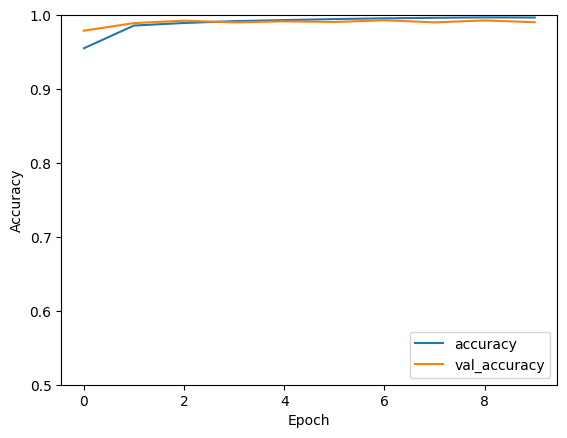

In [14]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [15]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 2s - loss: 0.0401 - accuracy: 0.9904 - 2s/epoch - 7ms/step
Test accuracy: 0.9904000163078308


In [16]:
# Realizar 5 diferentes predicciones con el conjunto de datos de prueba
predictions = model.predict(test_images[:5])
print('Predicciones:', predictions.argmax(axis=1))
print('Valores reales:', test_labels[:5])

1/1 [==============================] - 0s 428ms/step
Predicciones: [7 2 1 0 4]
Valores reales: [7 2 1 0 4]


In [17]:
print(test_acc)

0.9904000163078308


In [18]:
# Realizar la predicción con el modelo
prediccion = model.predict(test_images)

313/313 [==============================] - 3s 8ms/step


In [19]:
# Predicción de la imagen 1
print("Predicción (probabilidades):", prediccion[1])

Predicción (probabilidades): [  2.4858751   4.879262   20.788109  -13.606823   -5.0449147 -20.03542
  -2.244595   -3.262612  -13.988139  -11.071144 ]


In [20]:
# Probabilidad máxima (clase predicha)
print("Clase predicha:", np.argmax(prediccion[1]))

Clase predicha: 2


In [21]:
# Resultado real
print("Clase real:", test_labels[1])

Clase real: 2


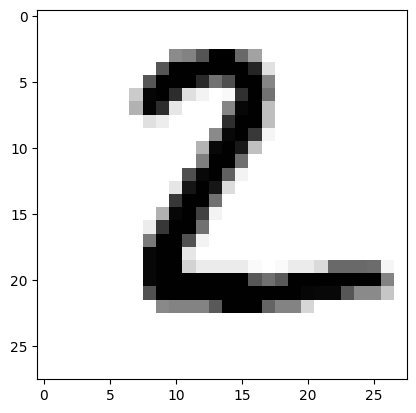

In [22]:
# Mostrar la imagen 1
plt.figure()
plt.imshow(test_images[1].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [23]:
# Se visualizan las predicciones
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

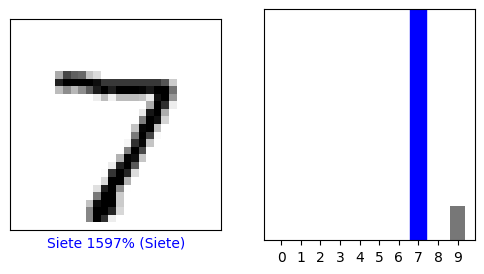

In [24]:
# Grafica de prediccion de imagen 1
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

313/313 [==============================] - 3s 8ms/step


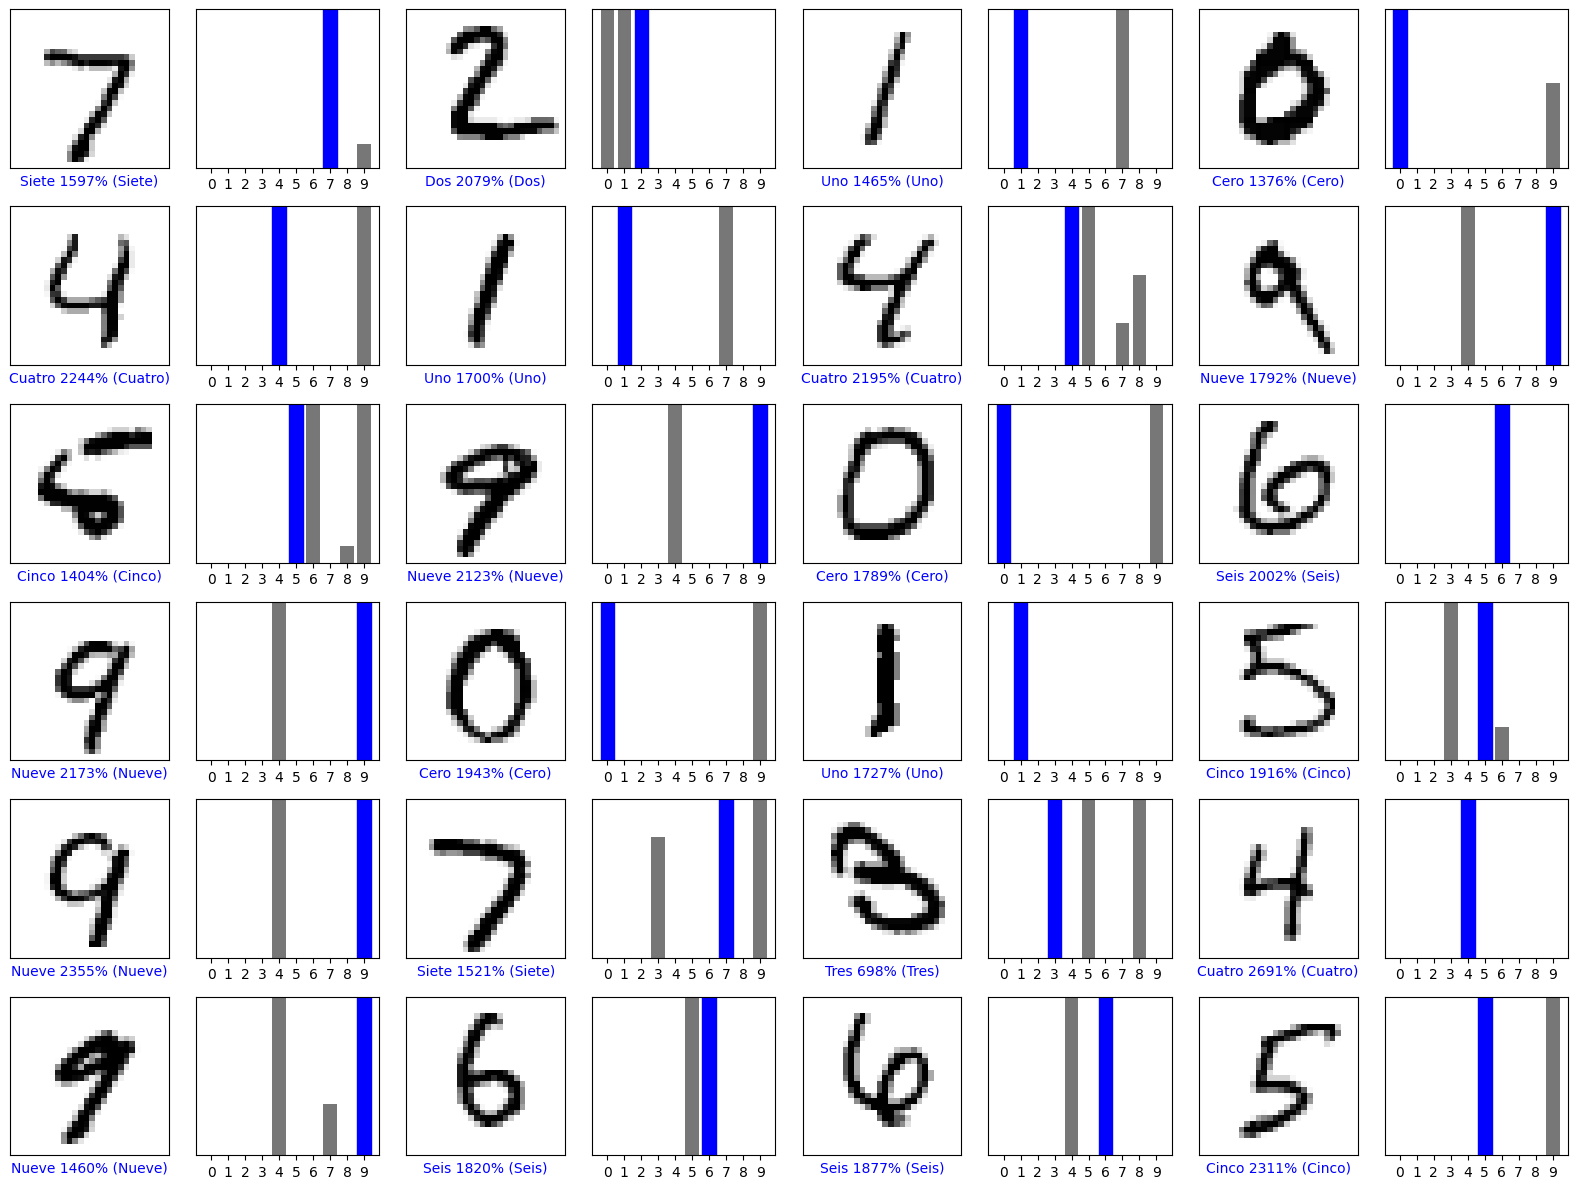

In [25]:
# Se grafican varias imagenes
predictions = model.predict(test_images)
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:
# Se selecciona imagen de conjunto de datos de prueba
img = test_images[1]
# Se imprime el tamaño de la imagen
print(img.shape)

(28, 28, 1)


In [27]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [28]:
# Se predice del lote que se creo
predictions_single = model.predict(img)

1/1 [==============================] - 0s 22ms/step


In [29]:
# Imprime prediccion del modelo
print(predictions_single)

[[  2.4858754   4.8792615  20.788109  -13.606824   -5.0449147 -20.035418
   -2.244595   -3.2626126 -13.988138  -11.071143 ]]


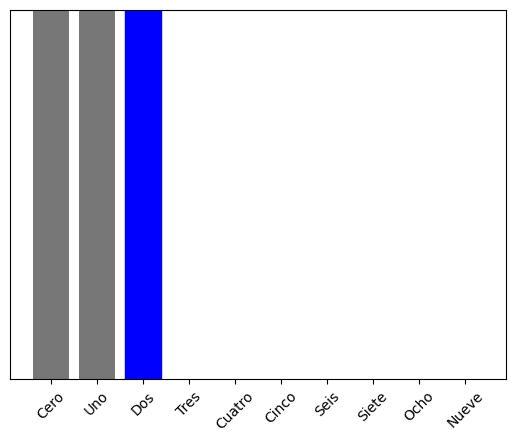

In [30]:
# Se visualiza grafica de probabilidades
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [31]:
# Se puede ver el valor mas alto de la imagen
np.argmax(predictions_single[0])

2

In [33]:
'''
PREGUNTAS
¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?
En las 2 actividades utilice el mimo numero de epocas.

¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?
En la Red Neuroanl Prealimentada obtuve una precisión de prueba de 0.9796, en la Red Neuronal Convolucional hubo una precisión de 0.9904.
Esto dice que la Red Neuronal Convolucional tiene un mejor rendimiento que la Red Neuronal Prealimentada en la tarea de clasificación de
imágenes del conjunto de datos MNIST.
'''

'\nPREGUNTAS\n¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?\nEn las 2 actividades utilice el mimo numero de epocas.\n\n¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?\nEn la Red Neuroanl Prealimentada obtuve una precisión de prueba de 0.9796, en la Red Neuronal Convolucional hubo una precisión de 0.9904.\nEsto dice que la Red Neuronal Convolucional tiene un mejor rendimiento que la Red Neuronal Prealimentada en la tarea de clasificación de \nimágenes del conjunto de datos MNIST.\n'